79.36344239452794
[1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]


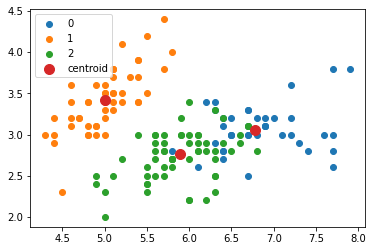

Silhouette Score :  0.5495175126471616


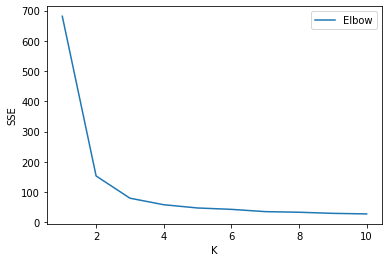

In [2]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_boston
from sklearn import datasets
from sklearn.model_selection import train_test_split
import math
from sklearn import metrics
from random import randrange
from sklearn.cluster import KMeans


data = pd.DataFrame((datasets.load_iris()).data)
target = pd.DataFrame((datasets.load_iris()).target)


df = data;
df = df.sample(frac = 1)



def intializeMembership(n,c):
  
  myu = []

  for i in range(n):
    x = []
    for j in range(c):
      x.append(random.uniform(0,1))

    myu.append(x)

  for i in range(n):
    s = 0
    for x in myu[i]:
      s += x
    myu[i] = [x/s for x in myu[i]]

  return myu


def SSE(c,a,assignment):

  sse = 0
  for i in range(len(a)):
    sse += np.linalg.norm(a[i] - c[assignment[i]]) * np.linalg.norm(a[i] - c[assignment[i]])

  return sse




def FCM(df,k,m,maxIterations):

  myu = intializeMembership(len(df),k)

  a = list(df.values)
  n = len(a)
  numFeatures = len(a[0])

  # finding centers ( number of clusters * number of features)
  c = [[0 for j in range(numFeatures)] for i in range(k)]

  

  



  itr = 1

  while itr <= maxIterations:

    
    
    for j in range(k):
      numerator = []
      denominator = 0
      for i in range(n):
        numerator.append([x*pow(myu[i][j],m) for x in a[i]])
        denominator += pow(myu[i][j],m)

      numerator = np.array(numerator)

      numerator = numerator.sum(axis = 0) 

      c[j] = [x/denominator for x in numerator]
    
    for i in range(n):
      for j in range(k):
        sum = 0
        for l in range(k):
          sum += pow(np.linalg.norm(a[i] - c[j])/np.linalg.norm(a[i] - c[l]),2/(m-1))
        
        myu[i][j] = 1/sum

    itr += 1

  
  assignment = []

 
  for i in range(n):
    assignment.append(np.argmax(myu[i]))

  return c,myu,assignment

def plotData(a,c,k,assignment):

  #Getting unique labels
  
  df = pd.DataFrame(a)
  df['label'] = assignment
  centroids = pd.DataFrame(c)

  u_labels = np.unique(assignment)
  
  #plotting the results:

  for i in u_labels:
    plt.scatter(df[df['label']==i][0] , df[df['label'] == i][1] , label = i)
  plt.scatter(centroids[0] , centroids[1], s=100,label = 'centroid')

  plt.legend()
  plt.show()  
  
# number of clusters
k = 3

# degree of fuzzification : usually 2
m = 2

a = list(df.values)

c,myu,assignment = FCM(df,k,m,50)

print(SSE(c,a,assignment))
# print(myu)
print(assignment)


plotData(a,c,k,assignment)

    
print('Silhouette Score : ',metrics.silhouette_score(a,assignment, metric='euclidean'))


sselist = []
klist = []
for i in range(1,11):
  c,myu,assignment = FCM(df,i,m,100)
  sselist.append(SSE(c,a,assignment))
  klist.append(i) 

plt.plot(klist,sselist,label=str('Elbow'))
plt.xlabel("K")
# naming the y axis
plt.ylabel("SSE")
plt.legend()
plt.show()





    

    





  


In [3]:
# Inbuilt Implementation.
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

score = metrics.silhouette_score(df, labels, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553


Silhouetter Score is almost same for both the KMeans and Fuzzy Clustering